<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web API and NLP

--- 
# Contents


---

### Contents:
Notebook 3
- [Part5](#Part5)
    - Importing Library
    - Load CSV files
    - Train test split
    - Baseline accuracy /null model
    - Naive Bayes
    - K-nearest neighbors
    - Logistic regression
    - Hyperparameter tuning, Gridsearch, Pipeline
    - Misclassified posts
    - Conclusion and recommendations
        - Analysis of misclassified posts
        - Model evaluation
        - Conclusions
        - Recommendations

--- 
# Part 5  
Modeling
---

## 5.1 Importing library

In [260]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from collections import Counter 


#sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, plot_roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [261]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

## 5.2 Load csv files

In [262]:
whiskey2 = pd.read_csv('../datasets/whiskey2.csv')
rum2 = pd.read_csv ('../datasets/rum2.csv')
whiskeyrum2 = pd.read_csv ('../datasets/whiskeyrum2.csv')

In [263]:
#remove all null
whiskeyrum2.dropna(axis=0, inplace=True)

In [264]:
#Rum = 1 , Whiskey = 0
whiskeyrum2['origin'] = whiskeyrum2['origin'].map({1:0, 2:1})

In [265]:
whiskeyrum2.head()

,alltext,origin
0,another pick liquor store next costco like flavors one,0
1,help get started hey fairley new whiskey would like som tips good starter whiskey play plan something good house nice meal evenings found atm maybe famous grouse know much bout whiskey appriciate help tips get,0
2,alan jackson silverbelly canada modest respectable whisky collection one favorites collecting celebrity bottles regardless quality anyhow big alan jackson fan want get hands bottle silverbelly anyone canada west coast know get,0
3,whiskey club anyone ever whiskey club curious costs bring bring good ot bad experiences,0
4,one step jameson black barrel friend loves stuff recently got green spot around bottle wondering theres something else could get well whats take,0


## 5.3 Train Test Split

In [266]:
#Define X and Y
X = whiskeyrum2['alltext']
y = whiskeyrum2['origin']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                   stratify = y)


## 5.4 Baseline accuracy/null model

In [267]:
#Rum = 0 , Whiskey = 1
#using the higher probability subreddit as baseline. 
y_test.value_counts(normalize=True)

0    0.541433
1    0.458567
Name: origin, dtype: float64

**Notes**  
Given a random text, there is a 53% chance of being correct if we were to pick whiskey as the origin subreddit

## 5.5 Naive Bayes

In [268]:
#fit TfidVectorization to train set
tfid_vect = TfidfVectorizer(ngram_range=(1,1))

In [269]:
#fit CountVectorizer to train set
ngram_vect = CountVectorizer(ngram_range=(1,1))

In [270]:
#fit N-grams TfidfVectorizer to train and testset
X_train_tfid = tfid_vect.fit_transform(X_train)
X_test_tfid = tfid_vect.transform(X_test)

#fit N-grams CountVectorizer to train and testset
X_train_ngrams2 = ngram_vect.fit_transform(X_train)
X_test_ngrams2 = ngram_vect.transform(X_test)

In [271]:
#Using Bernoulli Naive Bayes, TfidfVectorizer
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train_tfid, y_train)

print('Bernoulli Naive Bayes, TfidfVectorizer')
print('train score:', BernNB.score(X_train_tfid, y_train))
print('test score:', BernNB.score(X_test_tfid, y_test))

Bernoulli Naive Bayes, TfidfVectorizer
train score: 0.5413252165769141
test score: 0.5414325842696629


In [317]:
#Using Bernoulli Naive Bayes, CountVectorizer
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train_ngrams2, y_train)

print('Bernoulli Naive Bayes, CountVectorizer')
print('train score:', BernNB.score(X_train_ngrams2, y_train))
print('test score:', BernNB.score(X_test_ngrams2, y_test))


Bernoulli Naive Bayes, CountVectorizer
train score: 0.8876141418871458
test score: 0.8616573033707865


Multinomial Naive Bayes, TfidfVectorizer
train score: 0.9800983376258487
test score: 0.9571629213483146
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       771
           1       0.99      0.92      0.95       653

    accuracy                           0.96      1424
   macro avg       0.96      0.95      0.96      1424
weighted avg       0.96      0.96      0.96      1424



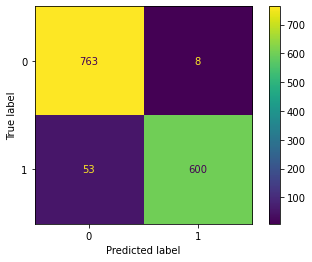

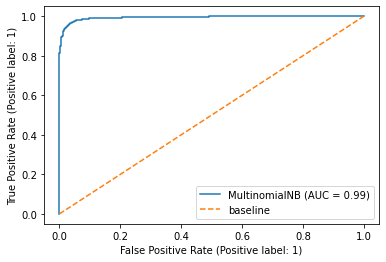

In [316]:
#Using Multinomial Naive Bayes, TfidfVectorizer
MultiNB1 = MultinomialNB()
MultiNB1.fit(X_train_tfid, y_train)


print('Multinomial Naive Bayes, TfidfVectorizer')
print('train score:', MultiNB1.score(X_train_tfid, y_train))
print('test score:', MultiNB1.score(X_test_tfid, y_test))

MultiNB1_pred = MultiNB1.predict(X_test_tfid)

cm1 = confusion_matrix(y_test, MultiNB1_pred)
tn,fp,fn,tp = confusion_matrix(y_test, knn_pred).ravel()
disp = ConfusionMatrixDisplay(cm1)
disp.plot();

print(classification_report(y_test, MultiNB1_pred))

plot_roc_curve(MultiNB1, X_test_tfid, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();


In [274]:
#Using Multinomial Naive Bayes, CountVectorizer
MultiNB = MultinomialNB()
MultiNB.fit(X_train_ngrams2, y_train)

print('Multinomial Naive Bayes, CountVectorizer')
print('train score:', BernNB.score(X_train_ngrams2, y_train))
print('test score:', BernNB.score(X_test_ngrams2, y_test))

Multinomial Naive Bayes, CountVectorizer
train score: 0.8876141418871458
test score: 0.8616573033707865


In [275]:
#Using Gaussian Naive Bayes, TfidfVectorizer
GausNB = GaussianNB()
GausNB.fit(X_train_tfid.toarray(), y_train)

print('Gaussian Naive Bayes, TfidfVectorizer')
print('train score:', GausNB.score(X_train_tfid.toarray(), y_train))
print('test score:', GausNB.score(X_test_tfid.toarray(), y_test))

Gaussian Naive Bayes, TfidfVectorizer
train score: 0.984078670100679
test score: 0.8026685393258427


In [276]:
#Using Gaussian Naive Bayes, CountVectorizer
GausNB = GaussianNB()
GausNB.fit(X_train_ngrams2.toarray(), y_train)

print('Multinomial Naive Bayes, CountVectorizer')
print('train score:', BernNB.score(X_train_ngrams2.toarray(), y_train))
print('test score:', BernNB.score(X_test_ngrams2.toarray(), y_test))

Multinomial Naive Bayes, CountVectorizer
train score: 0.8876141418871458
test score: 0.8616573033707865


**Note**  
Using Multinomial Naive Bayes, TfidfVectorizer seem to give the best score for train and test

MultiNB
train score: 0.9800983376258487
test score: 0.9571629213483146


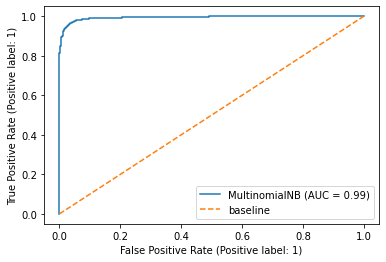

In [277]:
#Using Multinomial Naive Bayes to plot roc curve

#fit TfidVectorization to train and test set
X_train_tfid = tfid_vect.fit_transform(X_train)
X_test_tfid = tfid_vect.transform(X_test)

MultiNB = MultinomialNB()
MultiNB.fit(X_train_tfid, y_train)

print('MultiNB')
print('train score:', MultiNB.score(X_train_tfid, y_train))
print('test score:', MultiNB.score(X_test_tfid, y_test))

plot_roc_curve(MultiNB, X_test_tfid, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Notes**  
AUC = 0.99, means that there is 99% that the model is able to distinguish between positive and negative classes

## 5.6 K-nearest neighbors

KNeighborsClassifier(n_neighbors=3)
train score: 0.9534066963240458
test score: 0.8553370786516854
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       771
           1       0.78      0.94      0.86       653

    accuracy                           0.86      1424
   macro avg       0.86      0.86      0.86      1424
weighted avg       0.87      0.86      0.86      1424



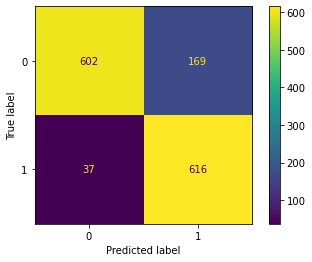

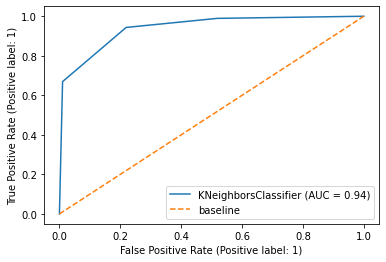

In [278]:
#Countvectorizer in KNN model

# Instantiate KNN with default k value of 3
knn = KNeighborsClassifier(n_neighbors = 3)
#fit vectorized X_train and y_train to model
knn.fit(X_train_ngrams2, y_train)
#predict Y values from train model with vectorized X_test
knn_pred = knn.predict(X_test_ngrams2)

print(knn)
print('train score:', knn.score(X_train_ngrams2, y_train))
print('test score:', knn.score(X_test_ngrams2, y_test))

# Save confusion matrix
cm = confusion_matrix(y_test, knn_pred)
tn,fp,fn,tp = confusion_matrix(y_test, knn_pred).ravel()
disp = ConfusionMatrixDisplay(cm)
disp.plot();

print(classification_report(y_test, knn_pred))

plot_roc_curve(knn, X_test_ngrams2, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();


KNeighborsClassifier(n_neighbors=3)
train score: 0.9468508546007961
test score: 0.8932584269662921
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       771
           1       0.90      0.87      0.88       653

    accuracy                           0.89      1424
   macro avg       0.89      0.89      0.89      1424
weighted avg       0.89      0.89      0.89      1424



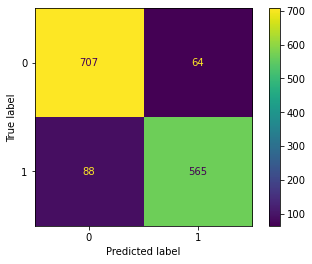

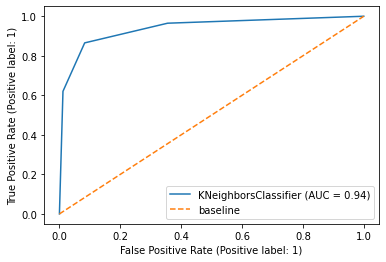

In [279]:
#TF-IDFin KNN model

# Instantiate KNN with default k value of 3
knn = KNeighborsClassifier(n_neighbors = 3)
#fit vectorized X_train and y_train to model
knn.fit(X_train_tfid, y_train)
#predict Y values from train model with vectorized X_test
knn_pred2 = knn.predict(X_test_tfid)

print(knn)
print('train score:', knn.score(X_train_tfid, y_train))
print('test score:', knn.score(X_test_tfid, y_test))

# Save confusion matrix
cm2 = confusion_matrix(y_test, knn_pred2)
tn,fp,fn,tp = confusion_matrix(y_test, knn_pred2).ravel()
disp = ConfusionMatrixDisplay(cm2)
disp.plot();

print(classification_report(y_test, knn_pred2))

plot_roc_curve(knn, X_test_tfid, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Notes**  
KNN (3n) with TF-IDF Vectorization perfomed better in terms of accuracy.

## 5.7 Logistic Regression

LogisticRegressionCV()
train score: 0.9995317255911964
test score: 0.9648876404494382


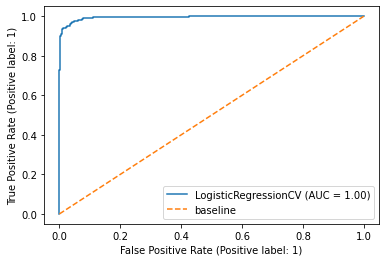

In [280]:
# Logistic Regression model , CountVectorization

# Instantiate Logistic Regression model
logreg = LogisticRegressionCV()
logreg.fit(X_train_ngrams2, y_train)

print(logreg)
print('train score:', logreg.score(X_train_ngrams2.toarray(), y_train))
print('test score:', logreg.score(X_test_ngrams2.toarray(), y_test))

plot_roc_curve(logreg, X_test_ngrams2, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

LogisticRegressionCV()
train score: 0.9971903535471787
test score: 0.9662921348314607


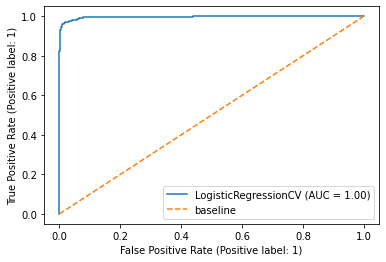

In [281]:
# Logistic Regression model , TFIDF

# Instantiate Logistic Regression model
logreg2 = LogisticRegressionCV()
logreg2.fit(X_train_tfid, y_train)

print(logreg2)
print('train score:', logreg2.score(X_train_tfid.toarray(), y_train))
print('test score:', logreg2.score(X_test_tfid.toarray(), y_test))

plot_roc_curve(logreg2, X_test_tfid, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [282]:
#Obtaining top 10 features of importance, Countvectorization
logreg_c = pd.DataFrame()
features = ngram_vect.get_feature_names()
logreg_c['features'] = pd.Series(features)
logreg_c['logreg'] = logreg.coef_[0].tolist()


feature_impt = logreg_c.sort_values('logreg', ascending= False).head(10)
feature_impt1


,features,logreg
10592,rum,5.313451
10626,rums,3.082411
4964,foursquare,2.539418
12913,true,1.956910
3522,diplomatico,1.892393
9252,plantation,1.881332
878,bacardi,1.761482
4033,el,1.605228
3756,dorado,1.605188
10393,rhum,1.601474


In [283]:
#Obtaining top 10 features of importance, TFIDF
logreg_c2 = pd.DataFrame()
features = tfid_vect.get_feature_names()
logreg_c2['features'] = pd.Series(features)
logreg_c2['logreg'] = logreg2.coef_[0].tolist()


feature_impt = logreg_c2.sort_values('logreg', ascending= False).head(10)
feature_impt2

,features,logreg
10592,rum,21.010369
10626,rums,8.374219
4964,foursquare,4.499022
10393,rhum,3.923778
878,bacardi,3.801197
9252,plantation,3.670987
558,appleton,3.412129
3522,diplomatico,3.261772
3756,dorado,3.224203
4033,el,3.216064


**Notes**  
Log reg with TFIDF is doing better on test score. 

## 5.8 Hyperparameter tuning,  Gridsearch, Pipeline

In [284]:
#Tuning/optimising TF-IDF Vectorization using KNN
tfidfknn_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', (KNeighborsClassifier()))
                ])

tfidf_params = {
    'tfidf__max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'tfidf__min_df': [2, 3],
    'tfidf__ngram_range': [(1,1), (2,2), (3,3)]}

tfidf_gs = GridSearchCV(tfidfknn_pipe, 
                             param_grid=tfidf_params, 
                             cv=5, verbose=1, n_jobs=-1)

tfidf_gs.fit(X_train, y_train)
print(tfidf_gs.best_score_)
print("best params: ", tfidf_gs.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.8829305504197652
best params:  {'tfidf__max_features': 6, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}


[[743  28]
 [145 508]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       771
           1       0.95      0.78      0.85       653

    accuracy                           0.88      1424
   macro avg       0.89      0.87      0.88      1424
weighted avg       0.89      0.88      0.88      1424

Using KNN with hypertuned TF-IDF
X_train score is: 0.8946382580191993
X_test score is: 0.8785112359550562


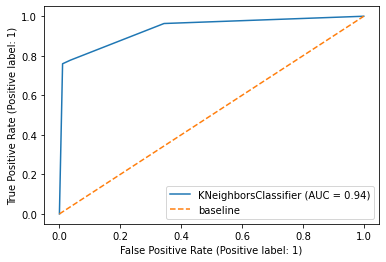

In [285]:
best_tfidf = TfidfVectorizer(max_features= 6, min_df= 2, ngram_range= (1, 1))
best_X_train_tvec = best_tfidf.fit_transform(X_train)
best_X_test_tvec = best_tfidf.transform(X_test)

knn.fit(best_X_train_tvec, y_train)

best_y_pred = knn.predict(best_X_test_tvec)
print(confusion_matrix(y_test, best_y_pred))
print(classification_report(y_test, best_y_pred))

print("Using KNN with hypertuned TF-IDF")
print('X_train score is:', knn.score(best_X_train_tvec, y_train))
print('X_test score is:', knn.score(best_X_test_tvec, y_test))

plot_roc_curve(knn, best_X_test_tvec, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [286]:
# performing grid search to find our best hyper-parameters for KNN, using hyper-tuned TVEC

knn_params = {
  'n_neighbors':[3,4,5,6,7,8,9,10,20,30,40,50,60,70,80]}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1, n_jobs=-1)

knn_gs.fit(best_X_train_tvec, y_train)

knn_params = knn_gs.best_params_
print(knn_params)

knn_n_neighbors = knn_gs.best_params_["n_neighbors"]

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'n_neighbors': 30}


Using KNN with TF-IDF
[[767   4]
 [154 499]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       771
           1       0.99      0.76      0.86       653

    accuracy                           0.89      1424
   macro avg       0.91      0.88      0.88      1424
weighted avg       0.91      0.89      0.89      1424

train score: 0.892765160383985
test score: 0.8890449438202247


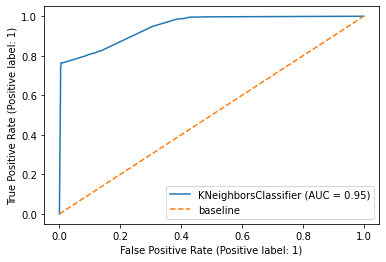

In [287]:
# Scoring hypertuned KNN with our hypertuned TF-IDF

best_knn = KNeighborsClassifier(n_neighbors = knn_n_neighbors)

best_knn.fit(best_X_train_tvec, y_train)


print("Using KNN with TF-IDF")
best_y_pred = best_knn.predict(best_X_test_tvec)
print(confusion_matrix(y_test, best_y_pred))
print(classification_report(y_test, best_y_pred))

print('train score:', best_knn.score(best_X_train_tvec, y_train))
print('test score:', best_knn.score(best_X_test_tvec, y_test))

plot_roc_curve(best_knn, best_X_test_tvec, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();



## 5.9 Missclassified Posts

In [288]:
#check types before concatenation of X_test, y_test and predictions
print(type(X_test))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [302]:
#concatenate predictions with X_test and y_test to identify the misclassified posts
#using Multinomial Bayes (TF-IDFVectorizer)
y_pred = MultiNB1.predict(X_test_tfid)
pred1 = pd.DataFrame(y_pred,columns=['pred'],index=y_test.index)
agg_posts = pd.concat([X_test,y_test,pred1],axis=1,sort=False)

#masking function for misclassified posts; all misclassified posts
agg_posts2 = (agg_posts[agg_posts['origin'] != agg_posts['pred']])
#Seeing all the misclassified posts
agg_posts2

,alltext,origin,pred
5183,plantation grande reserve rum popped open bought rum yesterday opened moment ago broke seal tried remove cork cork popped open gas mist release way champagne cork popped open slightly pressurized rum okay,1,0
5291,need alcohol labelling resource files australia one know get eps vector files standard drinks alcohol content anything else legally needed bottle rum creating brand rum graphic design project want make look genuine possible seem find files anywhere online sorry wrong place ask sort question,1,0
5082,sipping tonight finishing caroni right making scotch collection taste bland,1,0
5517,tip good people performing posting rum reviews hi reminder archive rum reviews done members way side bar write review click submission form mark place halls history wondering specific rum want learn general reviews go check archive anyway full great reviews note place link reviews outside subreddit websites please continuing best sub reddit mods edit feel free post thoughts comments questions concerns archive related data,1,0
3941,anyone setup rum tasting club city hello recently thinking lot setting rum tasting club city wanted see anyone done something similar could offer advice also reached local bourbon whiskey clubs get perspective thanks help insight greatly appreciated,1,0
4311,international shipping wondering legal order online shipped directly home florida usa seeing conflicting stuff online also able websites would guys recommend quite rums whiskeys seem available europe thanks,1,0
4224,watch nba finals live stream reddit nba finals live stream reddit,1,0
5364,bottle recommendation drink mostly whiskey bourbon rye malts think would nice branch bit least decent bottle two rum prefer whiskey higher proof abv like density complexity flavors perusing local liquor store even nicer rums seem mostly alcohol recommendations given love higher proof booze rather open otherwise although prefer richer flavors complexity,1,0
4562,advice drinking enjoying rum hey guys bought first bottle rum week want drink alone learn enjoy looked google tips get anything usefull wondering guys could give advices thank,1,0
4279,rum equivalents bourbon admit epic rum noob whiskey drinker entire adult life whiskey blog think getting rum minimal knowledge need learn internet resources actually really suck turning knowledge group questions wild turkey rum equivalent budget bourbon generally regarded solid drink stagg jr equivalent high proof expensive highly regarded overhyped thing good costs availability eg pappy best hidden secrets rum people know become annoying popular years thanks,1,0


In [303]:
#misclassified post total
print(agg_posts2.shape)

(61, 3)


In [304]:
#misclassified whiskey posts, origin = 0 (whiskey) but predicted 1 (rum)
len(agg_posts2[agg_posts2.origin == 0])

8

In [305]:
#misclassified rum posts, origin = 1 (rum) but predicted 0 (whiskey)
len(agg_posts2[agg_posts2.origin == 1])

53

In [306]:
#total whiskey posts
len(whiskeyrum2[whiskeyrum2.origin == 0])

3083

In [307]:
#total rum posts
len(whiskeyrum2[whiskeyrum2.origin == 1])

2612

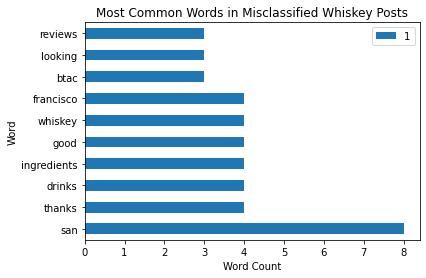

In [308]:
#obtaining index of misclassified whiskey posts
whiskey_misclass_index = agg_posts[(agg_posts.origin ==0) & (agg_posts.pred ==1)].index

#showing 10 most common words in misclassified cooking posts
whiskey_misclass = " ".join(agg_posts['alltext'][i] for i in whiskey_misclass_index)
pd.DataFrame(Counter(whiskey_misclass.split()).most_common()).head(10).set_index(0).plot(kind='barh')
plt.title('Most Common Words in Misclassified Whiskey Posts')
plt.xlabel('Word Count')
plt.ylabel('Word');

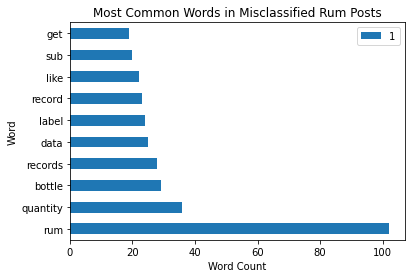

In [309]:
#obtaining index of misclassified rum posts
rum_misclass_index = agg_posts[(agg_posts.origin ==1) & (agg_posts.pred ==0)].index

#showing 10 most common words in misclassified baking posts
rum_misclass = " ".join(agg_posts['alltext'][i] for i in rum_misclass_index)
pd.DataFrame(Counter(rum_misclass.split()).most_common()).head(10).set_index(0).plot(kind='barh')
plt.title('Most Common Words in Misclassified Rum Posts')
plt.xlabel('Word Count')
plt.ylabel('Word');

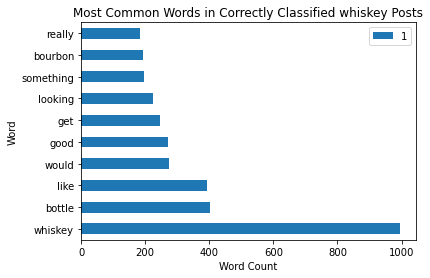

In [310]:
#obtaining index of correctly classified Whiskey posts
whiskey_rightclass_index = agg_posts[(agg_posts.origin ==0) & (agg_posts.pred ==0)].index

#showing 10 most common words in misclassified baking posts
whiskey_rightclass = " ".join(agg_posts['alltext'][i] for i in whiskey_rightclass_index)
pd.DataFrame(Counter(whiskey_rightclass.split()).most_common()).head(10).set_index(0).plot(kind='barh')
plt.title('Most Common Words in Correctly Classified whiskey Posts')
plt.xlabel('Word Count')
plt.ylabel('Word');

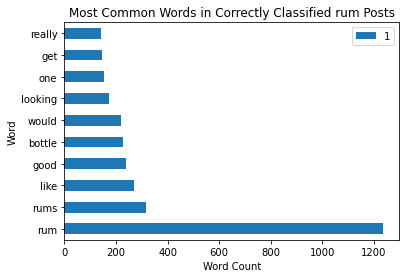

In [311]:
#obtaining index of correctly classified Rum posts
rum_rightclass_index = agg_posts[(agg_posts.origin ==1) & (agg_posts.pred ==1)].index

#showing 10 most common words in misclassified baking posts
rum_rightclass = " ".join(agg_posts['alltext'][i] for i in rum_rightclass_index)
pd.DataFrame(Counter(rum_rightclass.split()).most_common()).head(10).set_index(0).plot(kind='barh')
plt.title('Most Common Words in Correctly Classified rum Posts')
plt.xlabel('Word Count')
plt.ylabel('Word');

## 5.10 Conclusion and recommendations

### 5.10.1 Analysis of misclassified posts

There are 8/3083 whiskey posts (0.2%) that are misclassfied as rum and there are 53/2612 rum posts (2.0%) that are misclassified as whiskey post. It is also observed that the words rum and whiskey are the dominant words that helps the model to classify and predict that the post is classfied under either whiskey or rum respectively. Common words between both topic such as, get, really, good, looking, bottles is also rated highly in these posts.

It is observed that misclassified whiskey posts consist of a lot of the words 'rum' and 'whiskey' and all misclassified rum posts consist of a lot of the words 'rums' and 'bottle'

### 5.10.2 Model Evaluation

| Model | Train Score | Test Score | AUC Score |
| --- | --- | --- | --- |
| Bernoulli Naive Bayes (TfidfVectorizer) | 0.54 | 0.54 | - |
| Bernoulli Naive Bayes (CountVectorizer)| 0.88 | 0.86 | - |
| Multinomial Bayes (CountVectorizer) | 0.88 | 0.86 | - |
| Multinomial Bayes (TF-IDFVectorizer) | 0.98 | 0.95 | 0.99 |
| Gaussian Naive Bayes (CountVectorizer) | 0.88 | 0.86 | - |
| Gaussian Naive Bayes (TfidfVectorizer)| 0.98 | 0.80 | - |
| Logistic Regression (TF-IDFVectorizer) | 0.99 | 0.96 | 0.99 |
| KNeighborsClassifier (TF-IDFVectorizer) | 0.94 | 0.89 | 0.94 |
| Hypertuned KNeighborsClassifier (TF-IDFVectorizer) | 0.89 | 0.88 | 0.95 |

Based on the train, test and AUC scores, the TF-IDF Vectorized Multinomial Bayes is the best performing model. This indicates that it will be a good and accurate model at classifying the new post. The reason why Multinomial Bayes seems like the best model despite the equivalent test and AUC scores is because the train score for LogReg is 0.99 indicating that there might be overfitting As a result, the findings cannot be well-generalised to unseen data/posts. However, if sample size were to tend to infinity (i.e. very large datasets), Logistic Regression might be a better choice assuming the problem is still a binary classification problem.

Nonethless the 0.95 AUC score for both the Multinomial Bayes and 0.99 for Logistic Regression indicate that they are both well suited to predict which subreddit a post comes from. 

As for KNN, There is a slight improvement in the AUC score once both the Vectorizer and model are hypertuned. Train score dropped, less overfitting as compared to the un-hypertuned model. While it is still not the best predictor for whether a post belongs to a specific subreddit, it gives us insight into how hyperparameter tuning can could decrease overfitting of a model to our data. 

Our model performed at 95% as compared to the baseline, machine learning is effective in classification of subreddit text posts.

**Feature Importance**  
  
Using LogReg, a feature co-efficient list was retrived. The top ten features of importance can be seen below. These are the strong predictors that are used to classify the post

In [314]:
feature_impt2

,features,logreg
10592,rum,21.010369
10626,rums,8.374219
4964,foursquare,4.499022
10393,rhum,3.923778
878,bacardi,3.801197
9252,plantation,3.670987
558,appleton,3.412129
3522,diplomatico,3.261772
3756,dorado,3.224203
4033,el,3.216064


### 5.10.3 Conclusions

The Multinomial NB model was able to accurately classify 95% of the posts according to the subreddit and hence the model can be deployed for use. The model can also be deployed on more unseen posts to further validate its accuracy.  
  
By using the model, we can further classify the subreddit to either rum or whiskey to identify the preference and popularity of either alcohol. Future data could be used for training the model to better predict if the post is from rum or whiskey subreddit

### 5.10.4 Recommendations

We could improve the accuracy of predictions by trying and explore a more diverse range of models including but not limited to Random Forests Classifier, Ensemble Techniques, SVM, GLM in order to get better scores. 
  
Lemmetization did not reduce words to the similar root word. For example, 'go' and 'going' were both present in the word cloud and we may want to consider employ stemming during the pre-processing phase.  
  
Due to a shortage of time, only one model was improved upon, but in future reiterations of this project, it might be best to hypertune both the models and Vectorizers for all models being used so as to optimize their fit and prevent over and/or underfitting of data.  
  
When comparing the top words for both subreddits, similar words such as 'really', 'get' appeared for both and it would be worthwhile excluding them as stopwords as they may be unlikely to help in classification.  
  
Our model is also limited to whiskey and rum subreddit. It may be worth considering and exploring other related subreddits that may be able to better make predictions. We can also train our model with more data to be able to be able to increase the accuracy for rum.  
  
We may also web scrap data from other popular platforms such as facebook and twiter to obtain a wider range of data, instead of limiting to subreddit users.